## Data Analysis of the Interpolation-linear Imputation Data
<hr/>

</h3>We considered the data which has no null values and no imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> How TSA techniques assumes the dropped/missed values </li>
    <li> If there are any deviations then How much </li>
</ul>
    
    
<h4>Inference Results about ADF Test note that we consider seasonality here.</h4>
    
<ul>
    <li>By the ADFuller Test its better to use AR,MA and ARMA models for forecasting .</li>
    <li>Single difference suggests that ARIMA(p,1,q) can also be used.</li>
</ul>

<h4>Inference Results about Seasonality</h4>
    
<ul>
    <li>Seasonlity Period seems to be Cosine wave and it suggests that the period is between 300-400 days</li>
    <li>As per the data and the period suggest the seasonality would be of year 365 days</li>
    <li>SARIMA(p,d,q)(P,D,Q,S) models with d=0 will be fine but using d=1 models will be overfit</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
df = pd.read_csv("../../../../main/sub_data/single_variant/inter-linear/sin_ndlc_psp_inter-linear.csv",index_col="Date",parse_dates=True)

In [3]:
df = df.drop("Unnamed: 0",axis=1)

In [4]:
df

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-05-27,5051.0
2023-05-28,4780.0
2023-05-29,4782.0


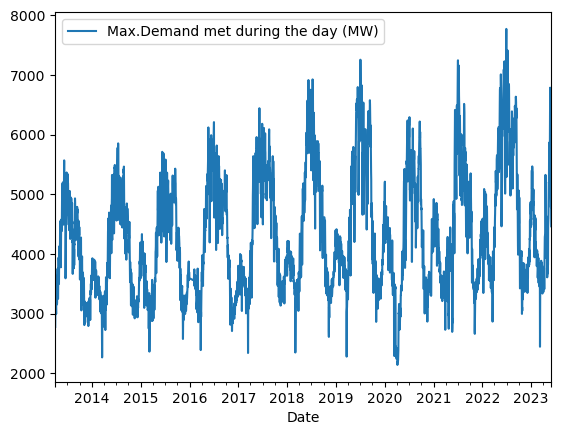

In [5]:
df.plot()
plt.show()

## Stationary Test

<hr/>
<h3>Before use the Time Series Forecasting models we must check if the time series is stationary </h3>
    
    Working Principle
    
<ul>
    <li>No Positive/Negative Trend</li>
    <li>Variance is constant</li>
    <li>Auto-correlation is constant </li>
</ul>

To check a Timeseries is Stationary/not we use ADF Test

    Null Hypothesis : The given timeseries is not stationary

    Inference Results
    
<ul>
    <li> test_statistic = -5.45 (Not Bad)</li>
    <li> P-value = 0.0000025 (< 0.05) Null Hypothesis Rejected </li>
</ul>

In [6]:
adf_results = adfuller(df)
print(adf_results)

(-5.390936743488891, 3.5388771573615964e-06, 29, 3683, {'1%': -3.4321267753335545, '5%': -2.862325080792323, '10%': -2.5671879100443813}, 50928.66685872068)


<center><h3>Take the First Difference</h3></center>

In [7]:
df1_diff1 = df.diff().dropna()
adf_results1 = adfuller(df1_diff1)
print(adf_results1)
df1_diff1.to_csv("../../../../main/sub_data/single_variant/inter-linear/sin_ndlc_psp_inter-linear_diff1.csv")

(-10.072788871290868, 1.2461838816762485e-17, 30, 3681, {'1%': -3.432127741384456, '5%': -2.8623255075213123, '10%': -2.5671881372202803}, 50940.83638400087)


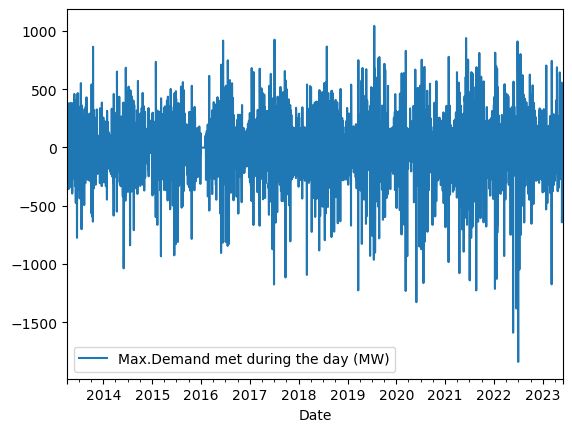

In [8]:
df1_diff1.plot()
plt.show()

<center><h3>Take the Second Difference</h3></center>


<ul>p-value of zero suggests that the test statistic significantly deviates from the null hypothesis, 
providing evidence to reject the null hypothesis. </ul>
<ul>In practical terms, it suggests that the time series is likely stationary, 
meaning it does not possess a unit root and has a stable mean and variance over time.</ul>


In [9]:
df1_diff2 = df1_diff1.diff().dropna()
adf_results2 = adfuller(df1_diff2)
print(adf_results2)
df1_diff2.to_csv("../../../../main/sub_data/single_variant/inter-linear/sin_ndlc_psp_inter-linear_diff2.csv")

(-21.44494951703129, 0.0, 30, 3680, {'1%': -3.432128224803953, '5%': -2.8623257210598148, '10%': -2.567188250900874}, 51024.82476554613)


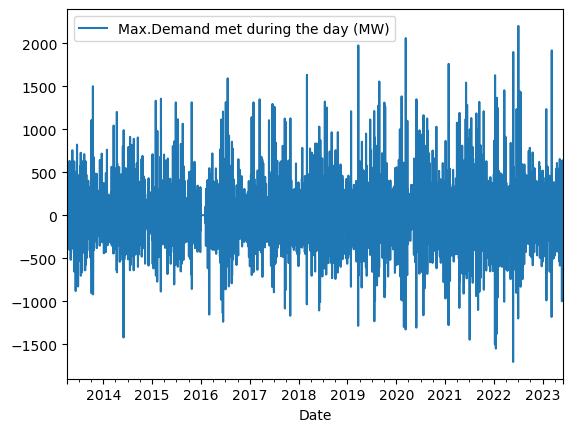

In [10]:
df1_diff2.plot()
plt.show()

<center><h3>Take the Third Difference</h3></center>

In [11]:
df1_diff3 = df1_diff2.diff().dropna()
adf_results3 = adfuller(df1_diff3)
print(adf_results3)

(-25.72858769509443, 0.0, 30, 3679, {'1%': -3.432128708486433, '5%': -2.862325934714449, '10%': -2.567188364643299}, 51427.33723708361)


## Check for Seasonality 
<hr/>

<h3>We have to Check if there's any Seasonal Trend in the time series if there's we need to use SARIMA Models</h3>

    Working Principle
<ul>
    <li>Plot the ACF (Auto-correlation Function) graph to find the period </li>
    <li>Check for Additive Seasonality and Multiplicative Seasonality</li>
    <li>Apply the Transforms</li>
    
</ul>


<h3>Plotting the ACF and PACF for the dataset </h3>

    Inference Results
    
<ul>
    <li>ACF plot seems to tails off</li>
    <li>PACF has lag of 2 seems to be an AR(1) model</li>
</ul>

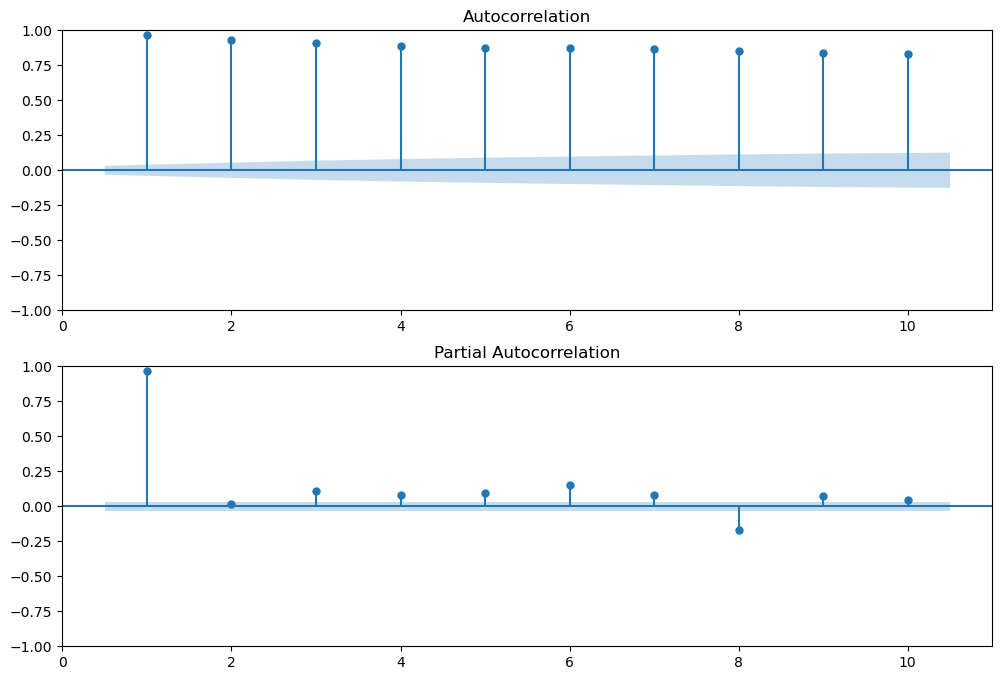

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df,lags=10,zero=False,ax=ax1)
plot_pacf(df,lags=10,zero=False,ax=ax2)
plt.show()

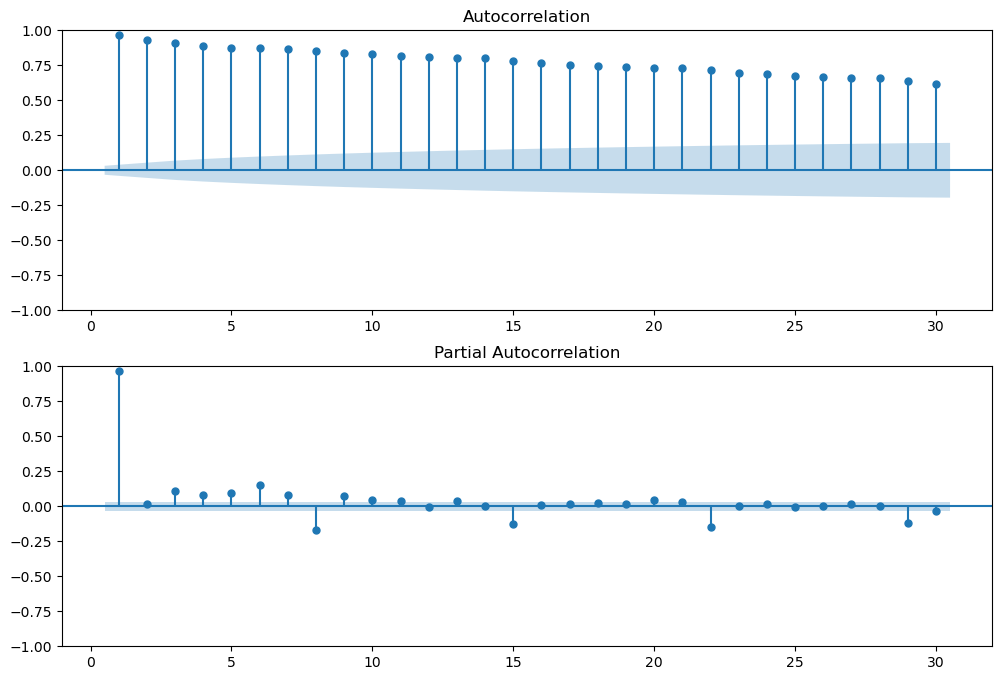

In [13]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df,lags=30,zero=False,ax=ax1)
plot_pacf(df,lags=30,zero=False,ax=ax2)
plt.show()

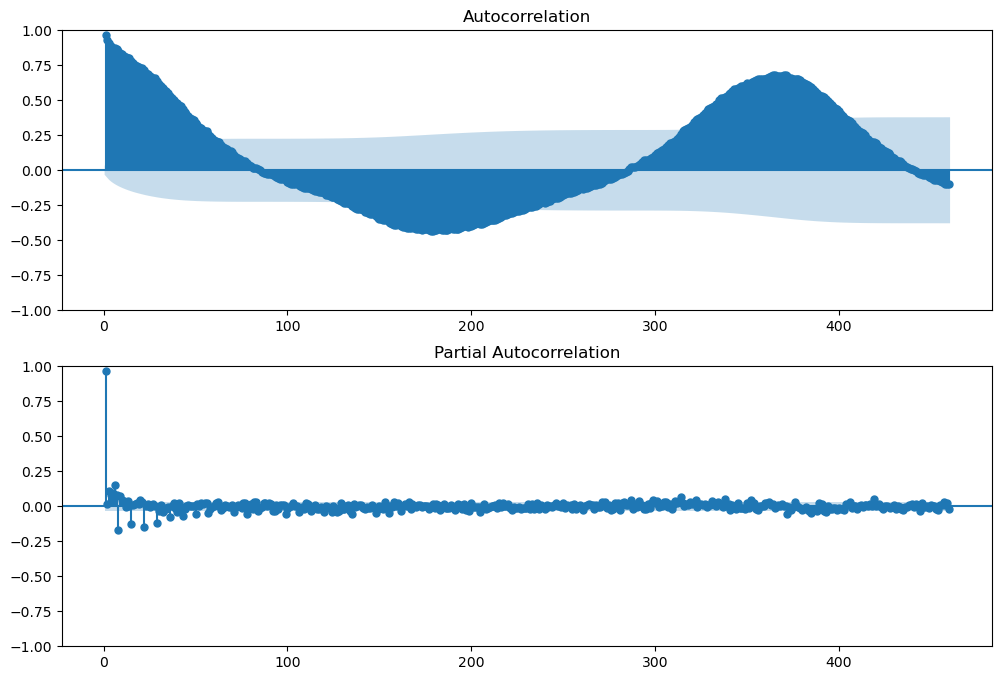

In [14]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df,lags=460,zero=False,ax=ax1)
plot_pacf(df,lags=460,zero=False,ax=ax2)
plt.show()

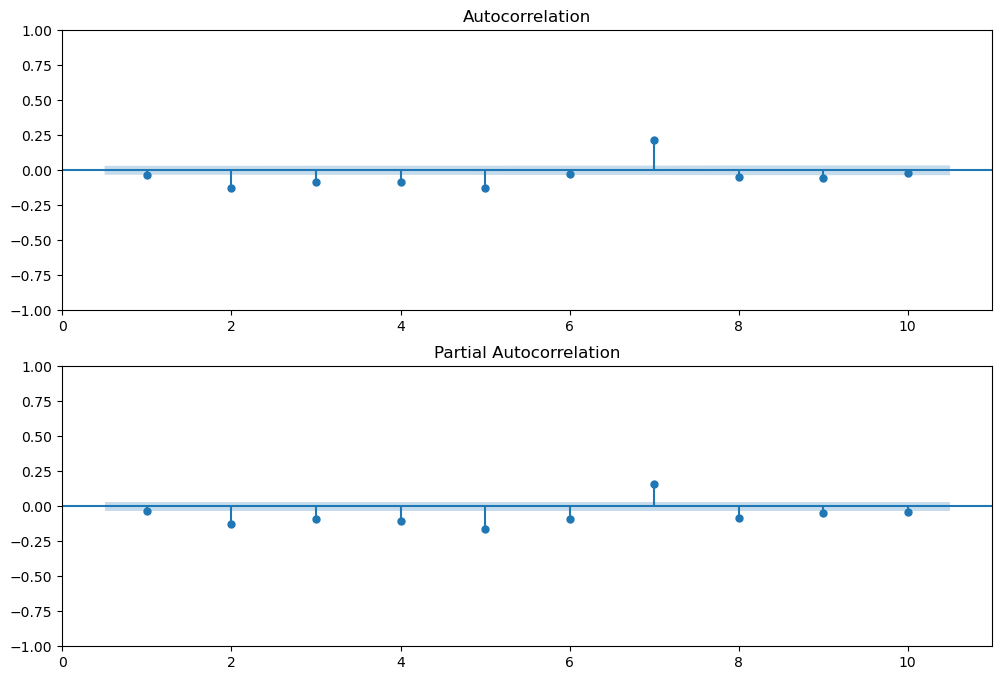

In [15]:
'''
If the ACF and PACF plots show similar patterns it indicates that the time series 
may not have any significant autocorrelation structure.

In such cases, it might be more appropriate to consider simpler models, 
such as a random walk or a model without AR or MA components.
'''
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df1_diff1,lags=10,zero=False,ax=ax1)
plot_pacf(df1_diff1,lags=10,zero=False,ax=ax2)
plt.show()

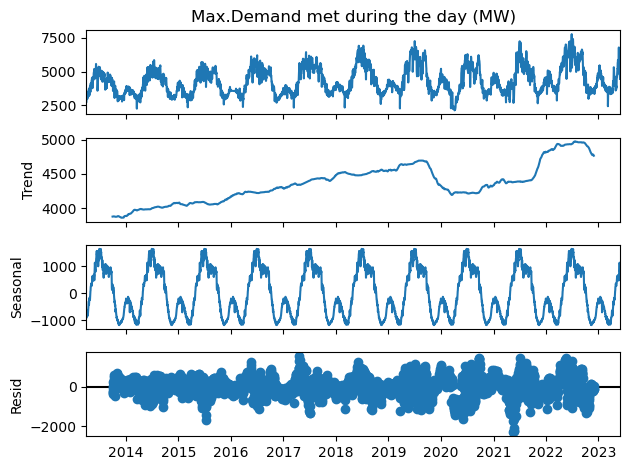

In [16]:
decompose = seasonal_decompose(df["Max.Demand met during the day (MW)"],period=365)
decompose.plot()
plt.show()

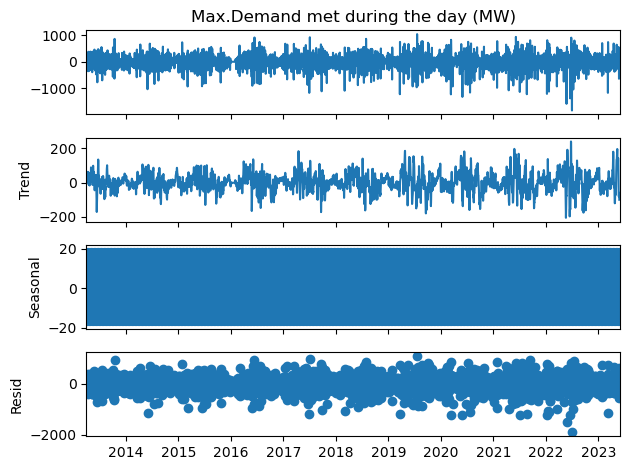

In [17]:
decompose = seasonal_decompose(df1_diff1["Max.Demand met during the day (MW)"],period=10)
decompose.plot()
plt.show()

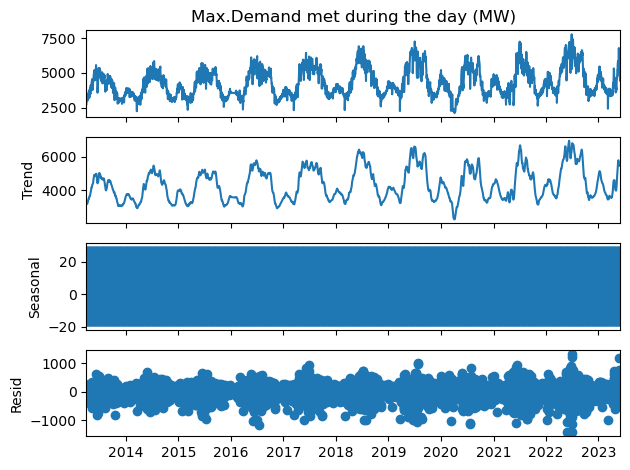

In [18]:
decompose = seasonal_decompose(df["Max.Demand met during the day (MW)"],period=12)
decompose.plot()
plt.show()

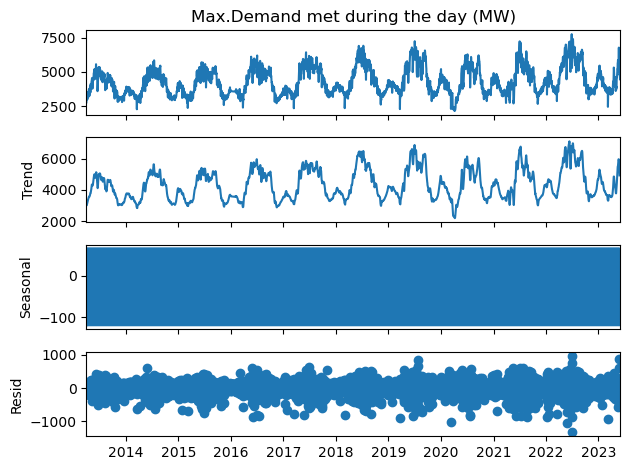

In [19]:
decompose = seasonal_decompose(df["Max.Demand met during the day (MW)"],period=7)
decompose.plot()
plt.show()

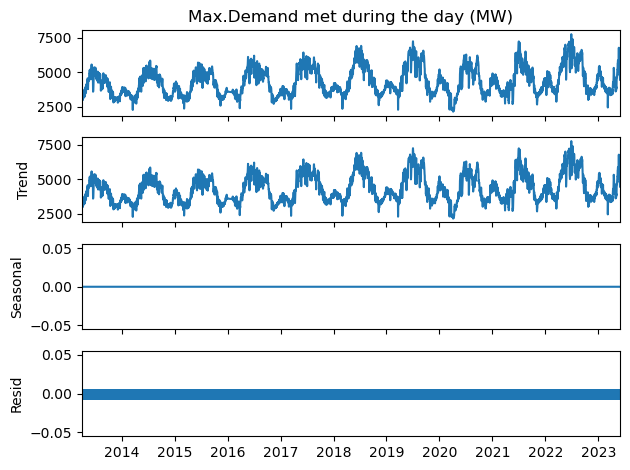

In [20]:
decompose = seasonal_decompose(df["Max.Demand met during the day (MW)"],period=1)
decompose.plot()
plt.show()

### References

[1] https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/